In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from meteostat import Point, Hourly
import plotly.express as px
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8.27)})
plt.rcParams.update({'font.size': 30})

In [2]:
meta_data = pd.read_csv("../data/pump_station_meta_data.csv", index_col=0)
columns=["DateTime", "Water_Height", "Power_P1", "Power_P2", "Outflow", "Effect_P2", "Effect_P1"]

In [3]:
def water_level_to_volume(water_level: pd.Series, pump):
    return water_level * (meta_data.loc[pump]["radius"]**2 * math.pi) * 1000

def minutes_to_date_timee(minutes: pd.Series, start_date: datetime):
    return pd.to_timedelta(minutes, unit='m')

In [4]:
# Read in the data PST
pump = "PST237"
year = "2021"
month = "August"

PST237 = pd.read_csv(f"../data/HistoricData/{pump}/{pump}_{year}_{month}.csv", encoding="cp1252", sep=";", decimal=",")
PST237.columns = columns
# PST237["DateTime"] = pd.to_datetime(PST237["DateTime"], infer_datetime_format=True)

In [5]:
PST237["Volume"] = water_level_to_volume(PST237["Water_Height"], "PST237")


In [6]:
PST237

,DateTime,Water_Height,Power_P1,Power_P2,Outflow,Effect_P2,Effect_P1,Volume
0,"01-08-2021 00:00:00,000",0.65,0.0,0.0,0.0,0.0,0.0,640.382247
1,"01-08-2021 00:00:30,000",0.67,0.0,0.0,0.0,0.0,0.0,660.086316
2,"01-08-2021 00:01:00,000",0.68,0.0,0.0,0.0,0.0,0.0,669.938350
3,"01-08-2021 00:01:30,000",0.69,0.0,0.0,0.0,0.0,0.0,679.790385
4,"01-08-2021 00:02:00,000",0.71,0.0,0.0,0.0,0.0,0.0,699.494454
...,...,...,...,...,...,...,...,...
79811,"31-08-2021 23:57:00,000",1.25,0.0,0.0,0.0,0.0,0.0,1231.504320
79812,"31-08-2021 23:57:30,000",1.27,0.0,0.0,0.0,0.0,0.0,1251.208389
79813,"31-08-2021 23:58:00,000",1.29,0.0,0.0,0.0,0.0,0.0,1270.912458
79814,"31-08-2021 23:58:30,000",1.31,0.0,0.0,0.0,0.0,0.0,1290.616528


# This dataset has two extra attributes
It does not seem to be relelevant what effect does here. 
P1 and P2 Show the same behaviour as in other pump stations

Text(0.5, 0, 'Time')

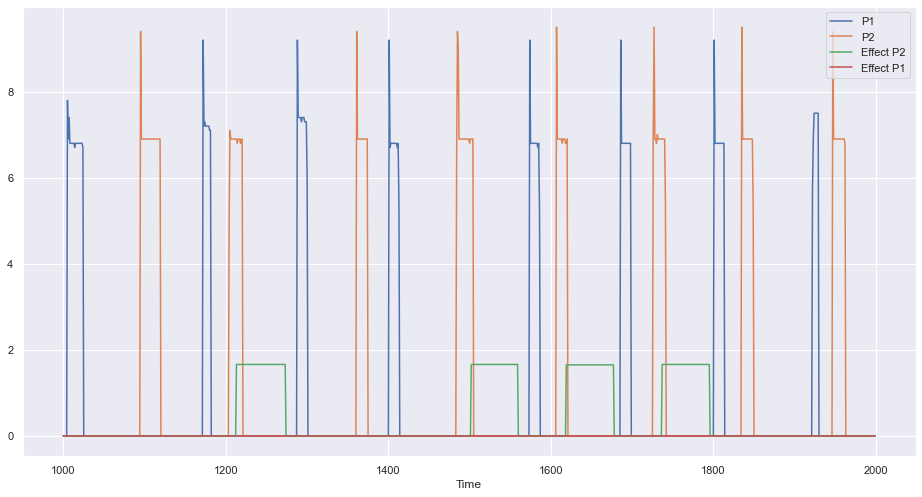

In [7]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
PST237["Power_P1"][1000:2000].plot()
PST237["Power_P2"][1000:2000].plot()
PST237["Effect_P2"][1000:2000].plot()
PST237["Effect_P1"][1000:2000].plot()
ax.legend(["P1", "P2", "Effect P2", "Effect P1"], loc="upper right")
ax.set_xlabel("Time")

# Does the pump run dry?
The outflow decreases while the pump is still running?

Text(0.5, 0, 'Time')

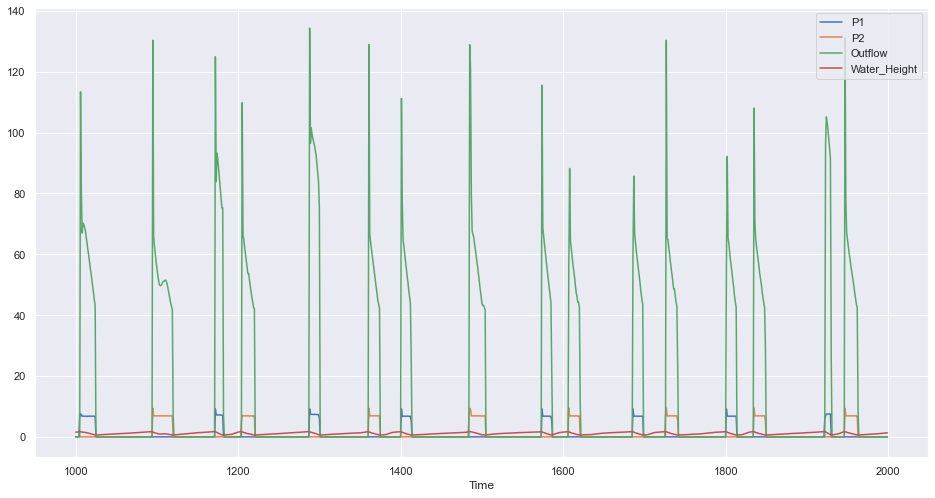

In [12]:
fig, ax = plt.subplots()
# PST237.Outflow[0:1000].plot(title="Outflow VS P1 Power VS P2 Power")
PST237["Power_P1"][1000:2000].plot()
PST237["Power_P2"][1000:2000].plot()
PST237["Outflow"][1000:2000].plot()
PST237["Water_Height"][1000:2000].plot()
# PST237["Effect_P2"][1000:2000].plot()
ax.legend(["P1", "P2", "Outflow","Water_Height"], loc="upper right")
ax.set_xlabel("Time")

# Water Height and Outflow looks alright. 

Text(0.5, 0, 'Time')

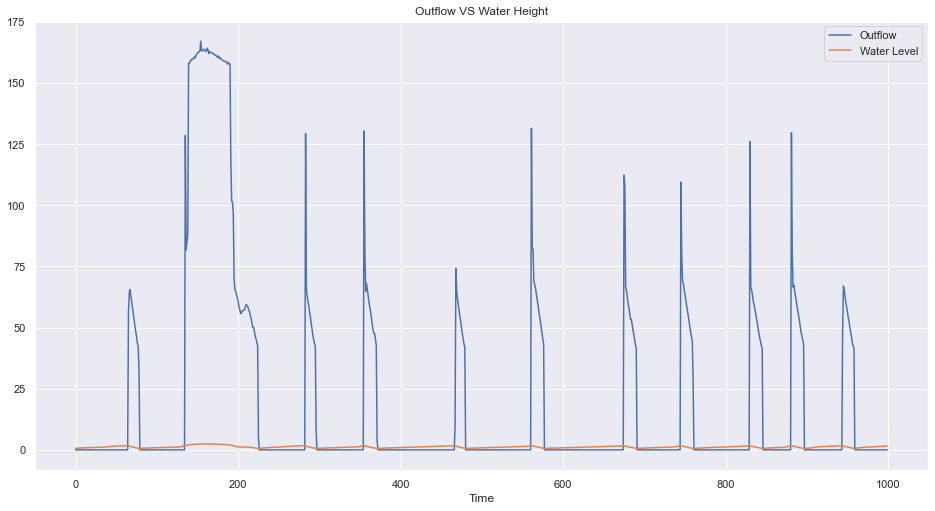

In [9]:
fig, ax = plt.subplots()
PST237.Outflow[0:1000].plot(title="Outflow VS Water Height")
PST237.Water_Height[0:1000].plot()
ax.legend(["Outflow", "Water Level"], loc="upper right")
ax.set_xlabel("Time")


In [10]:
# px.line(, x="DateTime", y="", title="PST232")
# px.line(PST238, x="DateTime", y="Outflow_RolAvg_7", title="PST238")

# plotly plot with outflow, Power P1, Power P2
px.line(PST237, x="DateTime", y="Outflow", title="Outflow")
px.line(PST237, x="DateTime", y="Power_P1", title="Power P1")
px.line(PST237, x="DateTime", y="Power_P2", title="Power P2")
fig.show()

/var/folders/h2/dn6zrky13q9bxg84bkm3t00w0000gn/T/ipykernel_30041/2130853089.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

